In [1]:
from summer_winter_cycle_gans import *
import logging, os

In [2]:
# Get the generators
gen_G = get_resnet_generator(name="generator_G")
gen_F = get_resnet_generator(name="generator_F")

# Get the discriminators
disc_X = get_discriminator(name="discriminator_X")
disc_Y = get_discriminator(name="discriminator_Y")

new_model =  CycleGan(
    generator_G=gen_G, generator_F=gen_F, discriminator_X=disc_X, discriminator_Y=disc_Y
)

In [7]:
new_model.load_weights("translated_models/summer2winter/summer2winter").expect_partial()
print("Weights loaded successfully")

Weights loaded successfully


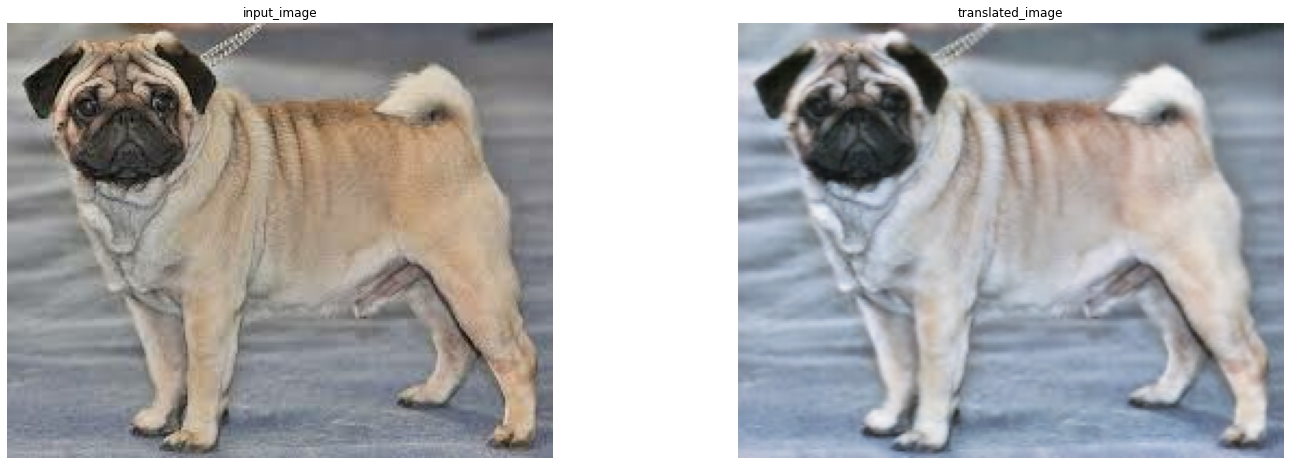

In [6]:
import torch, numpy as np
from PIL import Image
import torchvision.transforms as transforms
import tensorflow as tf, cv2
import matplotlib.pyplot as plt

path1 = r"D:\Dataset\face\test_gans\pic9.jpg"
path2 = r"D:\jupyter_nb_VSCode\Web_Dev-Des_with_html-css-js\flask_python\image_clf_flask\data\training_data\dog\dog_0024.jpg"
image = tf.io.read_file(path2)
image_c = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize([image_c], [256,256])
w, h = image_c.shape[:2]

prediction = new_model.gen_G(image, training=False)[0].numpy()
prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
image = (image[0] * 127.5 + 127.5).numpy().astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize = (24, 8))
ax[0].imshow(image_c)
ax[0].set_title("input_image")
ax[1].set_title("translated_image")
ax[1].imshow(cv2.resize(prediction.reshape(256,256,3), (h, w)))
ax[0].set_axis_off()
ax[1].set_axis_off()